In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from SupervisedAD_methods import *
from kdd import *

# Data Preprocessing

In [2]:
df = get_df('data/KDDTrain+.txt', columns=columns, drop=False)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
test_df = get_df('data/KDDTest+.txt', columns=columns, drop=False)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# categorical features
features_to_encode = ['protocol_type', 'service', 'flag']

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [5]:
data_train, data_test = feat_eng(df, test_df)
data_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,wrong_fragment,dst_host_same_src_port_rate,dst_host_same_srv_rate,srv_count,srv_rerror_rate,dst_host_rerror_rate,dst_host_diff_srv_rate,num_access_files,is_host_login
0,0,1,0,0,0,0,0,0,0,0,...,25,0,0.17,0.17,2,0.0,0.05,0.03,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0.88,0.00,1,0.0,0.00,0.60,0,0
2,0,1,0,0,0,0,0,0,0,0,...,26,0,0.00,0.10,6,0.0,0.00,0.05,0,0
3,0,1,0,0,0,0,0,0,0,0,...,255,0,0.03,1.00,5,0.0,0.00,0.00,0,0
4,0,1,0,0,0,0,0,0,0,0,...,255,0,0.00,1.00,32,0.0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,25,0,0.00,0.10,25,0.0,0.00,0.06,0,0
125969,0,0,1,0,0,0,0,0,0,0,...,244,0,0.01,0.96,2,0.0,0.00,0.01,0,0
125970,0,1,0,0,0,0,0,0,0,0,...,30,0,0.00,0.12,1,0.0,0.01,0.06,0,0
125971,0,1,0,0,0,0,0,0,0,0,...,8,0,0.00,0.03,8,0.0,0.00,0.05,0,0


In [6]:
scaler = StandardScaler()

new_attacks = [1,2,3,4]
test_classes = [0,1,2,3,4]


def get_x_y(df, data, classes=[0,1]):

    indices = df['attack_map'].isin(classes)
    x = data[indices]
    y = df['normal_flag'][indices]
    
    return x.to_numpy(), y.to_numpy()


x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

num_inputs = X.shape[-1]

# Modelling

## Neural Networks

In [7]:
# Build Models

def build_layer(activation, input_layer, sigma=0.5, train=False, layer_number=1,
                seed=0, neurons=5, batchnorm=False, regulariser=None):
    
    initialiser = tf.keras.initializers.GlorotUniform(seed=seed)
    
    if activation == "r":
        layer = RBFLayer(neurons, gamma=1.0, initializer=initialiser)(input_layer)
        
        if batchnorm:
            layer = tf.keras.layers.BatchNormalization()(layer)
            
    else:
        hidden = tf.keras.layers.Dense(neurons,
                      kernel_initializer=initialiser, kernel_regularizer=regulariser)(input_layer)
        
        if batchnorm:
            hidden = tf.keras.layers.BatchNormalization()(hidden)
            
        if activation == "b":
            layer = Bump(sigma=sigma, trainable=train,
                              name=f"bump{layer_number}")(hidden)
        elif activation == "s":
            layer = tf.math.sigmoid(hidden)
        else:
            layer = tf.nn.leaky_relu(hidden, alpha=0.01)
    
    return layer


def create_model(separation, activation, hidden_layers, num_inputs,
                 hidden_neurons=[40, 20, 10, 5], dropout=[0.0, 0.0, 0.0, 0.0], lr=0.001,
                 regularisation=[None, None, None, None],
                 sigma=0.5, train=False, loss='binary_crossentropy', batchnorm=False,
                 seed=0, name_suffix=""):
    
    sep = {"RBF": "r", "ES": "b", "HS": "s"}
    
    tf.keras.utils.set_random_seed(seed)

    input_layer = tf.keras.Input(shape=(num_inputs,))
    
    if len(hidden_neurons) != 0:
        
        hidden_layers = len(hidden_neurons)
        hidden = input_layer
    
        for i, n in enumerate(hidden_neurons):
            hidden = build_layer(activation, hidden, sigma=sigma, train=train,
                                 layer_number=1+i, seed=seed+42*i, neurons=n,
                                 batchnorm=batchnorm, regulariser=regularisation[i])
            if dropout[i] > 0.:
                hidden = tf.keras.layers.Dropout(dropout[i])(hidden)
            
        out = build_layer(sep[separation], hidden, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)
        
    else:
        hidden1 = build_layer(activation, input_layer, sigma=sigma, train=train, layer_number=1, seed=seed+42)
        hidden2 = build_layer(activation, hidden1, sigma=sigma, train=train, layer_number=2, seed=seed+123)

        if hidden_layers == 2:

            out = build_layer(sep[separation], hidden2, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

        elif hidden_layers == 3:

            hidden3 = build_layer(activation, hidden2, sigma=sigma, train=train, layer_number=3, seed=seed+1234)   
            out = build_layer(sep[separation], hidden3, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

    model = tf.keras.Model(inputs=input_layer, outputs=out, name=f'{separation}{hidden_layers}{activation}{name_suffix}')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                            loss=loss)
    
    return model

In [8]:
# Train and Evaluate Models

def train_eval(model, X, y, x_test, y_test, y_true_train=None, epochs=1000, train=False, hidden_layers=2,
               verbose=0, shuffle=False, plot=False,
               val_split=0.1, callbacks=[early_stopping], seed=0, diff=True, writer=False,
               indiv=new_attacks, 
#                att_labels=df_test_att['attack'], 
              att_labels=test_df['attack_map'], pos_label=0):
    
    # Train the model
    tf.keras.utils.set_random_seed(seed)
    cbs = callbacks.copy()
    if train:
        # learnable sigma
        get_weights = GetWeights(layer_names=[f"bump{i}" for i in range(1, hidden_layers+1)])
        cbs.append(get_weights)
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)
        viz_sigma(get_weights)
        
    else:
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)

        
    # Evaluation
#     viz_boundary(data_viz, model, grid=grid, writer=writer)

    y_train = model.predict(X)
    y_pred = model.predict(x_test)
    
    if y_true_train is None:
        y_true_train = y
    else:
        # Deep SAD: Use true labels and 0: attack, 1: normal
        # Flip for AUPR
        y_train = -y_train
        y_pred = -y_pred
        
    aupr_train = get_metrics(y_train, y_true_train, model.name, plot=plot, pos_label=pos_label)
    
    aupr_test = get_metrics(y_pred, y_test, model.name, plot=plot, pos_label=pos_label)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attacks = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attacks.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model.name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
        return aupr_train, aupr_test, aupr_attacks
    
    if diff:
        y_pos = np.mean(y_pred_pos)
        y_neg = np.mean(y_pred_neg)
        diff_mean = y_pos - y_neg
        print(f"Average Difference between Positive and Negative Class: {diff_mean}")
        
        return aupr_train, aupr_test, diff_mean
    
    return aupr_train, aupr_test


# strategy = tf.distribute.MirroredStrategy()

In [9]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


### Deep SAD

In [10]:
class SAD_Dist(tf.keras.layers.Layer):

    def __init__(self, centre):
        super(SAD_Dist, self).__init__(trainable=False)
        self.centre = centre

        
    def build(self, input_shape):  # Create the state of the layer (weights)
        pass

    
    def call(self, x):  # Defines the computation from inputs to outputs
        return tf.norm(x - self.centre, axis=1)
    
    
class SAD(tf.keras.Model):
    
    def __init__(self, encoder, dist):
        super(SAD, self).__init__()
        self.encoder = encoder
        self.sad_dist = dist


    def call(self, x):  # Defines the computation from inputs to outputs
        return self.sad_dist(self.encoder(x))

3540/3540 [==============================] - 11s 3ms/step
Model: "sad_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ae__module_5 (AE_Module)    multiple                  16831     
                                                                 
 sad__dist_9 (SAD_Dist)      multiple                  0         
                                                                 
Total params: 16,831
Trainable params: 16,650
Non-trainable params: 181
_________________________________________________________________
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.4629 - val_loss: 0.2324
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2384 - val_loss: 0.1545
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1772 - val_loss: 0.1255
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1

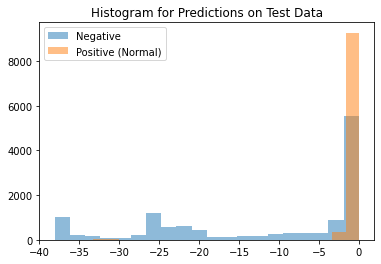

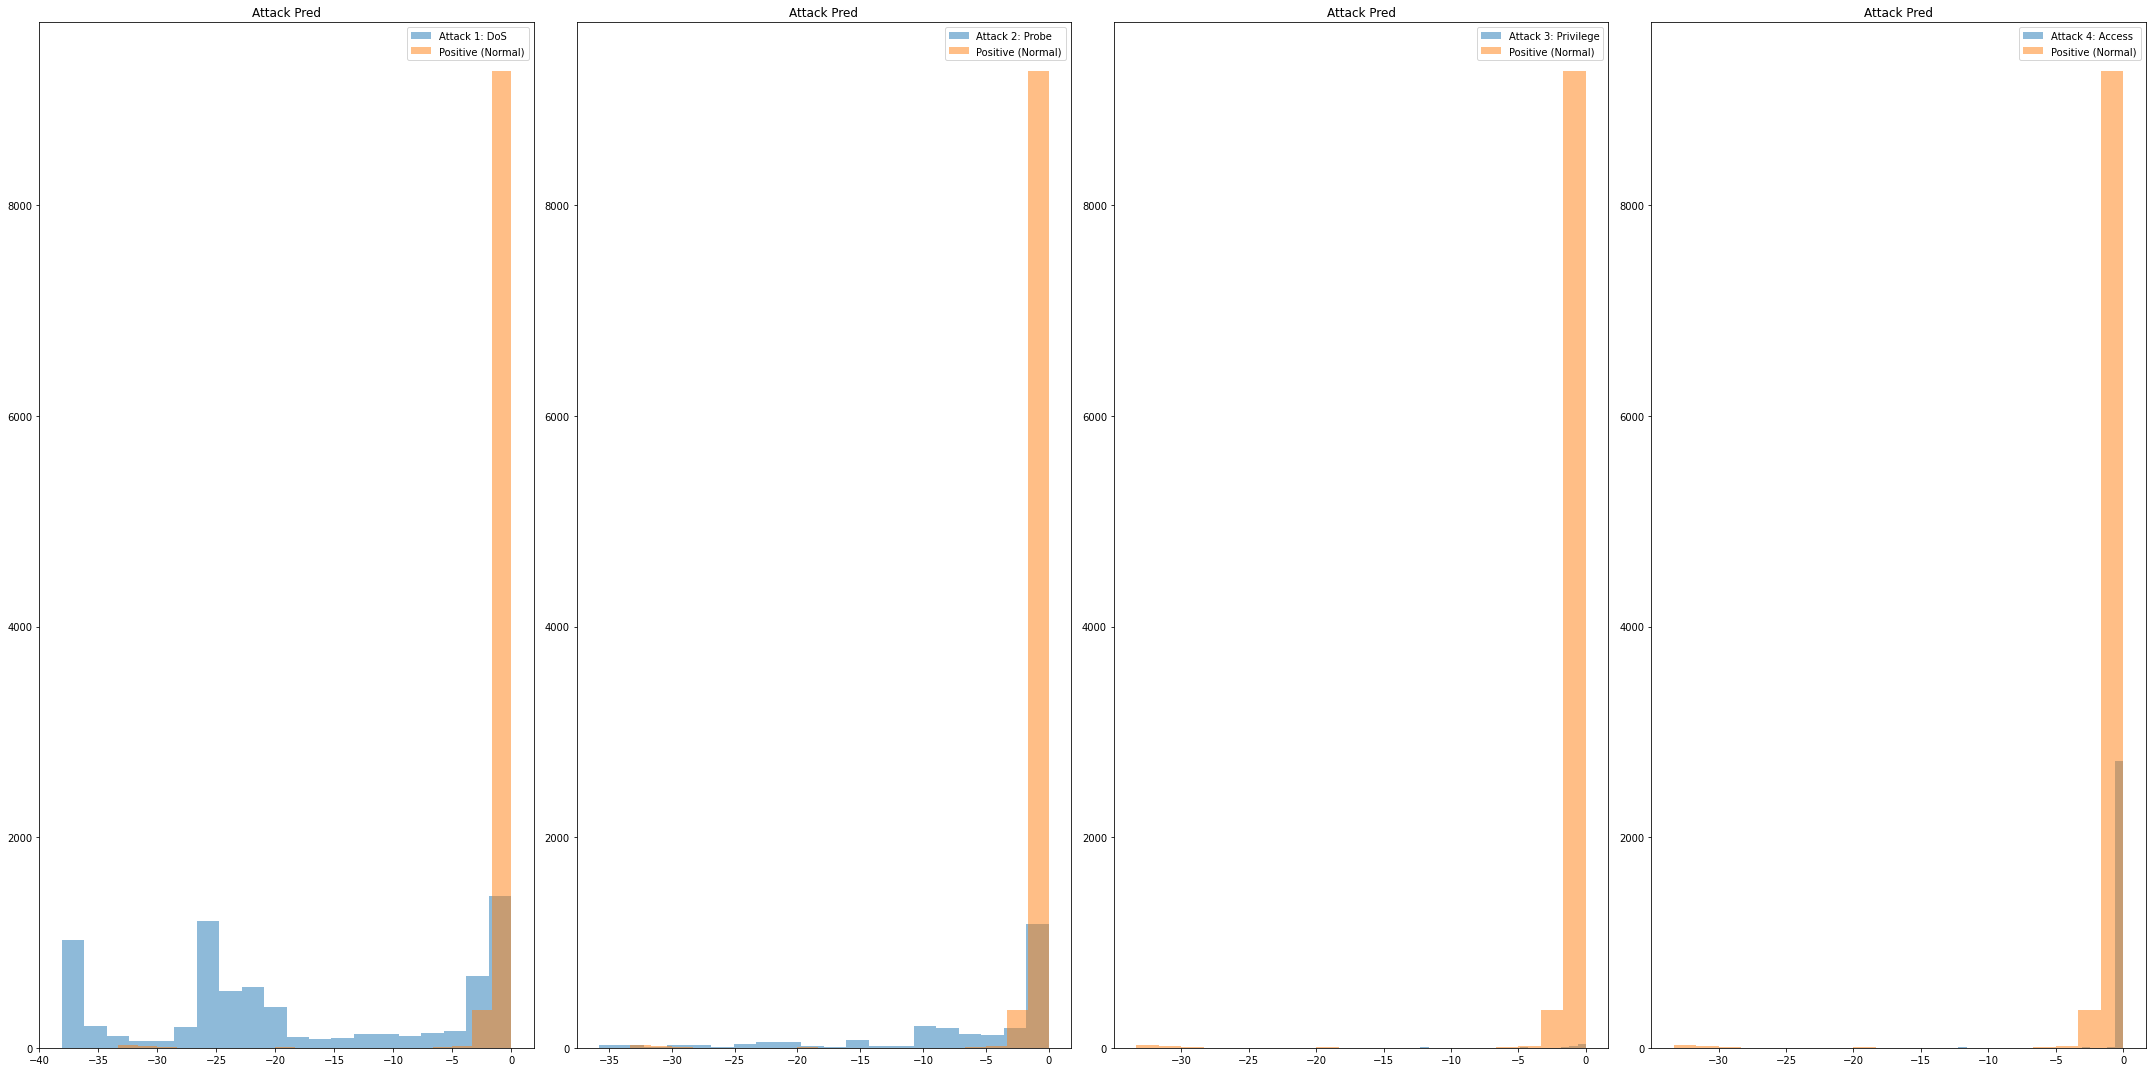

AUPR Train Run 1: 0.9999111376052738
AUPR Test Run 1: 0.9506646056365564
AUPR Indiv Test Run 1: [0.9585875435609656, 0.7922989090130894, 0.047428154430499275, 0.5163538884515257]
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.4629 - val_loss: 0.2324
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2384 - val_loss: 0.1545
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1772 - val_loss: 0.1255
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1536 - val_loss: 0.1133
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1448 - val_loss: 0.1042
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1401 - val_loss: 0.0981
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1295 - val_loss: 0.0938
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1210 - val_lo

Epoch 76/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0653 - val_loss: 0.0376
Epoch 77/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0627 - val_loss: 0.0373
Epoch 78/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0613 - val_loss: 0.0373
Epoch 79/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0606 - val_loss: 0.0380
Epoch 80/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0600 - val_loss: 0.0368
Epoch 81/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0601 - val_loss: 0.0382
Epoch 82/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0590 - val_loss: 0.0382
Epoch 83/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0606 - val_loss: 0.0378
Epoch 84/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0603 - val_loss: 0.0373
Epoch 85/500
3186/3186 [==============================]

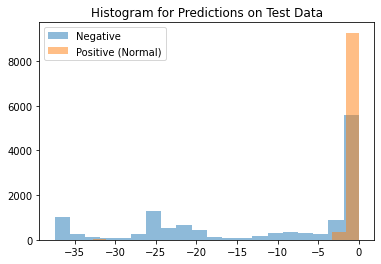

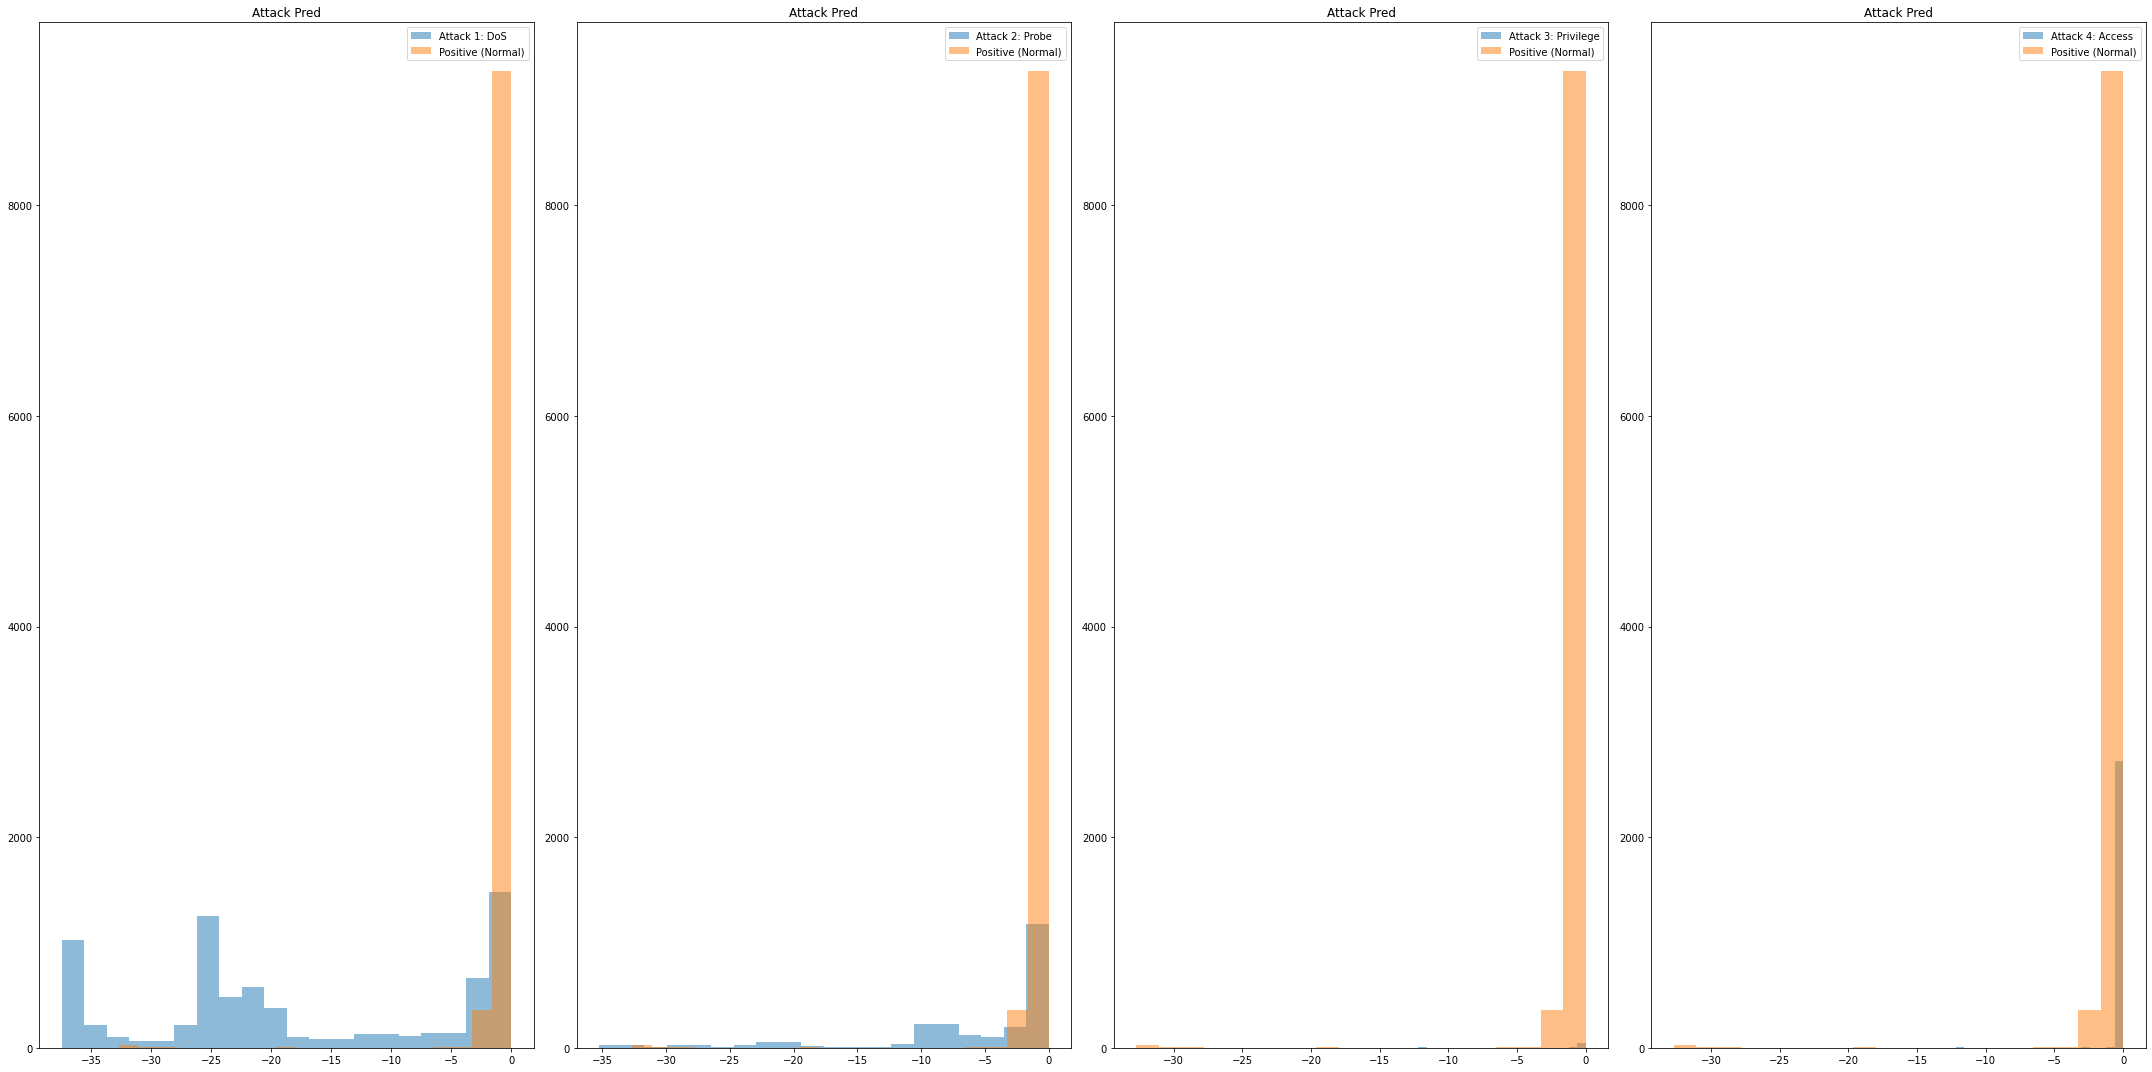

AUPR Train Run 2: 0.9999005059088106
AUPR Test Run 2: 0.9541772062213786
AUPR Indiv Test Run 2: [0.9628440726570023, 0.8000284382509387, 0.04939449820619783, 0.5110148502249012]
Epoch 1/500
3186/3186 [==============================] - 20s 5ms/step - loss: 0.4629 - val_loss: 0.2324
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2384 - val_loss: 0.1545
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1772 - val_loss: 0.1255
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1536 - val_loss: 0.1133
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1448 - val_loss: 0.1042
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1401 - val_loss: 0.0981
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1295 - val_loss: 0.0938
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1210 - val_los

Epoch 76/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0615 - val_loss: 0.0375
Epoch 77/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0590 - val_loss: 0.0396
Epoch 78/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0602 - val_loss: 0.0369
Epoch 79/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0593 - val_loss: 0.0384
Epoch 80/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0605 - val_loss: 0.0371
Epoch 81/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0583 - val_loss: 0.0385
Epoch 82/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0603 - val_loss: 0.0362
Epoch 83/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0585 - val_loss: 0.0373
Epoch 84/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0629 - val_loss: 0.0355
Epoch 85/500
3186/3186 [==============================]

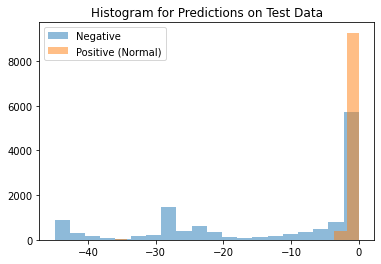

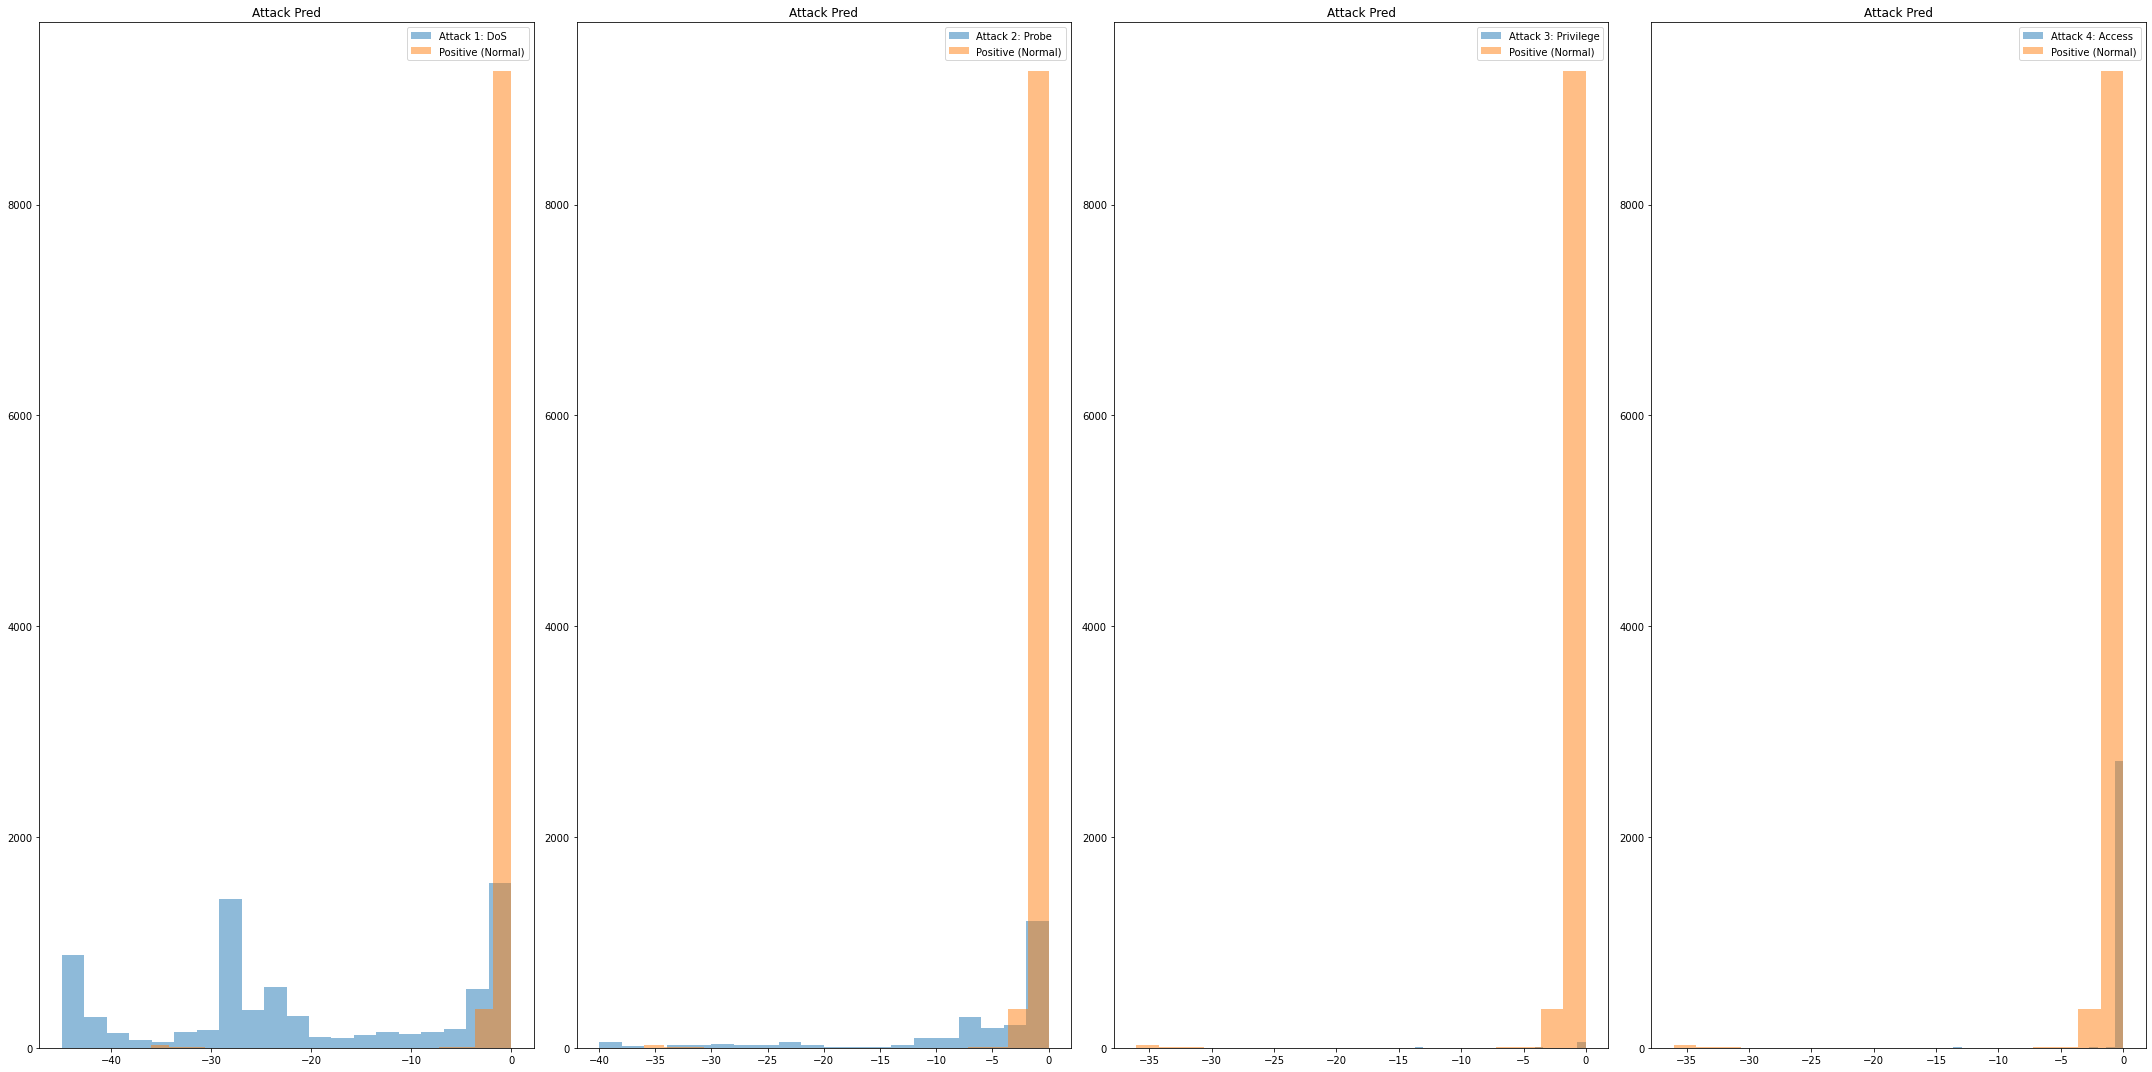

AUPR Train Run 3: 0.9999086769835431
AUPR Test Run 3: 0.9505734075361489
AUPR Indiv Test Run 3: [0.9594300799132031, 0.7927228603219767, 0.0450889109703806, 0.4993892476034562]
AUPR (Train): 0.9999067734992092+-4.544277124660302e-06
AUPR (Test): 0.9518050731313613+-0.0016777645486272586


,0,1,2,AUPR Mean,AUPR Std
1,0.958588,0.962844,0.959430,0.960287,0.002254
2,0.792299,0.800028,0.792723,0.795017,0.004345
3,0.047428,0.049394,0.045089,0.047304,0.002155
4,0.516354,0.511015,0.499389,0.508919,0.008674


([0.9999111376052738, 0.9999005059088106, 0.9999086769835431],
 [0.9506646056365564, 0.9541772062213786, 0.9505734075361489],
 {0: [0.9585875435609656,
   0.7922989090130894,
   0.047428154430499275,
   0.5163538884515257],
  1: [0.9628440726570023,
   0.8000284382509387,
   0.04939449820619783,
   0.5110148502249012],
  2: [0.9594300799132031,
   0.7927228603219767,
   0.0450889109703806,
   0.4993892476034562]})

In [11]:
# Deep SAD
verbose = 1      # can change this to 0 to suppress verbosity during training
plot = False
shuffle = False
val_split = 0.1
repeats = 3
epochs = 500
batchnorm = True

train = False
lr = 3e-4

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True)
callbacks = [early_stopping]

# y for normal is 1 and for abnormal is -1
y_DSAD = 2 * y - 1

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_deep_sad = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)
        
        encoder_path = "models/KDD99/Encoder_Bump_90_60"
        
        deep_sad = tf.keras.models.load_model(encoder_path)
        
        if i == 0:
            
            train_mean = tf.cast(tf.math.reduce_mean(deep_sad.predict(X), axis=0), tf.float32)

        regulariser = tf.keras.regularizers.L2(l2=1e-1)

        for layer in deep_sad.layers:
            if hasattr(layer, 'kernel_regularizer'):
                setattr(layer, 'kernel_regularizer', regulariser)
                
        def deep_sad_loss(y_true, y_pred):

    #         y_pred - train_mean
    #         tf.norm(y_pred - train_mean, axis=1)

            return tf.math.pow(y_pred, y_true)
                
        
        model = SAD(deep_sad, SAD_Dist(train_mean))

        model.compile(loss=deep_sad_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

        for module in model.layers:
            if hasattr(module, 'layers'):
                for layer in module.layers:
                    if hasattr(layer, 'kernel_regularizer'):
                        print(layer.kernel_regularizer)

        
        if i == 0:
            model.build((None, num_inputs))
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y_DSAD.astype(np.float32), x_test, y_test,
                                                        y_true_train=y.astype(np.float32),
                                                        epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_deep_sad.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks